In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 




Cloning into 'DeOldify'...
remote: Enumerating objects: 2327, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 2327 (delta 47), reused 27 (delta 10), pack-reused 2228
Receiving objects: 100% (2327/2327), 69.46 MiB | 25.21 MiB/s, done.
Resolving deltas: 100% (1054/1054), done.


In [2]:
cd DeOldify

/content/DeOldify


In [3]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch
import os
import tensorflow as tf
from keras.models import load_model
from PIL import Image, ImageOps
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
from google.colab import drive
drive.mount('/content/drive')

if not torch.cuda.is_available():
    print('GPU not available.')

Mounted at /content/drive


In [4]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 214 kB 5.3 MB/s 
     |████████████████████████████████| 129 kB 47.4 MB/s 
     |████████████████████████████████| 1.9 MB 43.7 MB/s 
     |████████████████████████████████| 78 kB 6.9 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26324 sha256=652acace6b277ad9f027198d18351c7e842b425ce3232fd96585b76427e851f6
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [5]:
# os-moduulin importtaus
import os

# kansio esim. Drivessä
image_folder = '/content/drive/MyDrive/Pilvilaskenta2021_Noora_Angelva/Pilvi3Kuva/'

# haetaan tiedostojen nimet
image_files = os.listdir(image_folder)

# kerätään tähän listaan silmukassa tiedostot (kuvat)
photos = []

for i in image_files:
  photos.append(image_folder + "/" + i)

# tarkistetaan mitkä tiedostot löytyvät
print(photos)

['/content/drive/MyDrive/Pilvilaskenta2021_Noora_Angelva/Pilvi3Kuva//Emmi.jpg', '/content/drive/MyDrive/Pilvilaskenta2021_Noora_Angelva/Pilvi3Kuva//ilona-bellotto-rbPplWrpgcU-unsplash.jpg', '/content/drive/MyDrive/Pilvilaskenta2021_Noora_Angelva/Pilvi3Kuva//geran-de-klerk-9yvADFNcXOc-unsplash.jpg', '/content/drive/MyDrive/Pilvilaskenta2021_Noora_Angelva/Pilvi3Kuva//hoach-le-dinh-5DJqsjAYlmk-unsplash.jpg']


In [6]:
import fastai
from deoldify.visualize import *

torch.backends.cudnn.benchmark = True

In [7]:
!mkdir 'models'
!wget https://www.dropbox.com/s/usf7uifrctqw9rl/ColorizeStable_gen.pth?dl=0 -O ./models/ColorizeStable_gen.pth

--2021-12-14 12:55:16--  https://www.dropbox.com/s/usf7uifrctqw9rl/ColorizeStable_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/usf7uifrctqw9rl/ColorizeStable_gen.pth [following]
--2021-12-14 12:55:16--  https://www.dropbox.com/s/raw/usf7uifrctqw9rl/ColorizeStable_gen.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7d5a2cdcc0e217445c2686f31b.dl.dropboxusercontent.com/cd/0/inline/Bb3wc9d96wSmjNrudk1m2nlhLXVliA8YaIAnD0Ybk4cRs0e0xog7-ySHvwt9epupVGOVIndKR-gmC_MLf9SoUG92DxGgXN1jjxKk35pueLgVQFPaYTiTvU1FqUo4bHrjgzLixeqtM97qrI5l-MlW-FgG/file# [following]
--2021-12-14 12:55:16--  https://uc7d5a2cdcc0e217445c2686f31b.dl.dropboxusercontent.com/cd/0/inline/Bb3wc9d96wSmjNrudk1m2nlhLXVliA8YaIAnD0Ybk4cRs0e0xog7-yS

In [8]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2021-12-14 12:55:59--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2021-12-14 12:55:59 (28.7 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [9]:
colorizer = get_image_colorizer(artistic=False)

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential s

  0%|          | 0.00/171M [00:00<?, ?B/s]

In [10]:

render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"}

for i in photos:
  if i is not None and i !='':
      image_path = i
      show_image_in_notebook(image_path)
  else:
      print('Provide an image url and try again.')

Output hidden; open in https://colab.research.google.com to view.

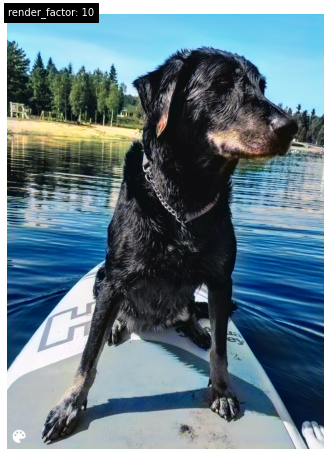

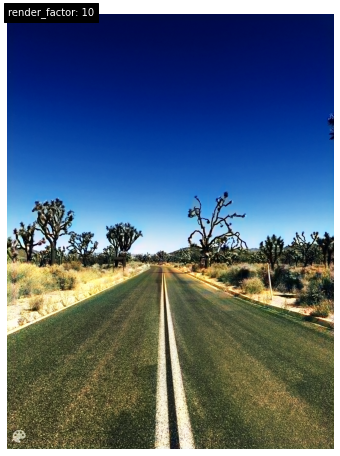

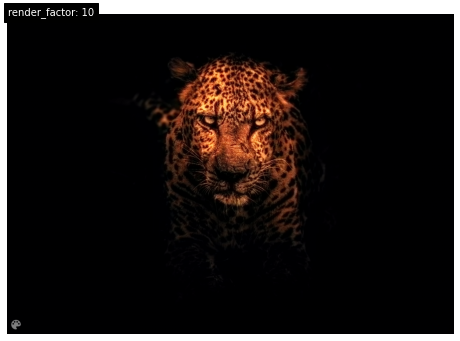

In [ ]:
for i in photos:
  if i is not None and i !='':
      image_path = i
      #for i in range(10,40,2):
      colorizer.plot_transformed_image(image_path, render_factor=10, display_render_factor=True, figsize=(8,8))
      